In [2]:
import numpy as np
import os
import pandas as pd 
os.chdir('/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project')
from Modules.support_functions import *

In [3]:
#Import Schizophrenia data
os.chdir('/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project/Data/psykose/Patient')
files = os.listdir()
files.sort(key=natural_keys)
shizophrenia_p = list()
for i in range(0,len(files)):
    shizophrenia_p.append(pd.read_csv(files[i]))
    
os.chdir('/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project/Data/psykose/control')
files = os.listdir()
files.sort(key=natural_keys)
shizophrenia_c = list()
for i in range(0,len(files)):
    shizophrenia_c.append(pd.read_csv(files[i]))
#Import demographics on Schizophrenia patients
os.chdir('/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project/Data/psykose')
patients_info = pd.read_csv('patients_info.csv')


In [4]:
#Convert strings to datetime 
for i in range(0, len(shizophrenia_c)):
    shizophrenia_c[i]['timestamp'] = pd.to_datetime(shizophrenia_c[i]['timestamp'],format='%Y-%m-%d %H:%M:%S')
    shizophrenia_c[i] = shizophrenia_c[i].drop(['date'], axis=1)

#Convert strings to datetime 
for i in range(0, len(shizophrenia_p)):
    shizophrenia_p[i]['timestamp'] = shizophrenia_p[i]['timestamp'].astype('datetime64[ns]')
    shizophrenia_p[i] = shizophrenia_p[i].drop(['date'], axis=1)


In [5]:
#get daily data for patients
patients_daily = list()
for i in range(0,len(shizophrenia_p)):
    patients_daily.append(get_intervals(shizophrenia_p[i],intervals = 0))

# get day and night data for patients 


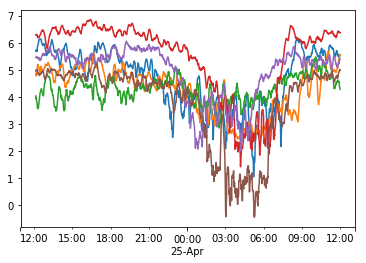

In [14]:
a = get_intervals(shizophrenia_p[0],intervals = 0)
b = get_intervals(shizophrenia_c[0],intervals = 0)

c = get_intervals(shizophrenia_p[1],intervals = 0)
d = get_intervals(shizophrenia_c[1],intervals = 0)

e = get_intervals(shizophrenia_p[2],intervals = 0)
f = get_intervals(shizophrenia_c[2],intervals = 0)

np.log(a.mean(axis=1).rolling(10).mean()).plot()
np.log(b.mean(axis=1).rolling(10).mean()).plot()
np.log(c.mean(axis=1).rolling(10).mean()).plot()
np.log(d.mean(axis=1).rolling(10).mean()).plot()
np.log(e.mean(axis=1).rolling(10).mean()).plot()
np.log(f.mean(axis=1).rolling(10).mean()).plot()